### EDA on Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Why do EDA?
*   Model building
*   Analysis and reporting
*   Validate assumptions
*   Handling missing values
*   Feature engineering
*   Detecting outliers
*   Iterations

# STEP-1: COLUMN TYPES

**Question: What are the column names and their data types?**

* **Numerical** - Time, Amount, V1...V28
* **Categorical** - class
* **Mixed** - none

In [10]:
columns_summary = pd.DataFrame({
    'Data Types' : df.dtypes.astype(str)
})
columns_summary

,Data Types
Time,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [12]:
df.shape

(99121, 31)

**Question: How many rows and columns are in the dataset?**

Rows = 99121, Columns = 31

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99121 entries, 0 to 99120
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99121 non-null  int64  
 1   V1      99121 non-null  float64
 2   V2      99121 non-null  float64
 3   V3      99121 non-null  float64
 4   V4      99121 non-null  float64
 5   V5      99121 non-null  float64
 6   V6      99121 non-null  float64
 7   V7      99121 non-null  float64
 8   V8      99121 non-null  float64
 9   V9      99121 non-null  float64
 10  V10     99121 non-null  float64
 11  V11     99121 non-null  float64
 12  V12     99121 non-null  float64
 13  V13     99121 non-null  float64
 14  V14     99121 non-null  float64
 15  V15     99121 non-null  float64
 16  V16     99121 non-null  float64
 17  V17     99121 non-null  float64
 18  V18     99121 non-null  float64
 19  V19     99121 non-null  float64
 20  V20     99121 non-null  float64
 21  V21     99120 non-null  float64
 22

**Question: Are there any missing or null values in the dataset?**
Answer: Yes, there are missing values in certain columns (after V20)

In [17]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Question: What are the minimum, maximum, mean, and median values for numerical columns like Amount?**

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,...,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000
mean,42213.815861,-0.262004,-0.033117,0.676050,0.162447,-0.279002,0.094272,-0.108333,0.056136,-0.045671,...,-0.030524,-0.109128,-0.036949,0.009122,0.132233,0.026676,0.000626,0.001712,98.115561,0.002240
std,16959.616226,1.860400,1.658620,1.325288,1.350168,1.356758,1.301340,1.212608,1.207004,1.122196,...,0.719862,0.634433,0.634429,0.594982,0.441032,0.494743,0.393954,0.325556,265.286809,0.047273
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33380.000000,-1.027973,-0.599728,0.177007,-0.712131,-0.898502,-0.647594,-0.600418,-0.137605,-0.699085,...,-0.224552,-0.531169,-0.176426,-0.323574,-0.131810,-0.325217,-0.062543,-0.005363,7.570000,0.000000
50%,44112.000000,-0.260205,0.077775,0.754452,0.191743,-0.314473,-0.157188,-0.069316,0.073908,-0.118182,...,-0.057606,-0.083721,-0.049300,0.064890,0.170100,-0.070453,0.009817,0.023319,26.430000,0.000000
75%,55528.000000,1.153321,0.735516,1.376924,1.032558,0.249811,0.486727,0.415134,0.359821,0.560705,...,0.119279,0.308336,0.081573,0.406241,0.419958,0.301190,0.082976,0.076518,89.000000,0.000000
max,66973.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


##STEP-2: UNIVARIATE OR SINGLE COLUMN ANALYSIS


In [18]:
df['Time'].describe()

,Time
count,99121.000000
mean,42213.815861
std,16959.616226
min,0.000000
25%,33380.000000
50%,44112.000000
75%,55528.000000
max,66973.000000


<Axes: ylabel='Frequency'>

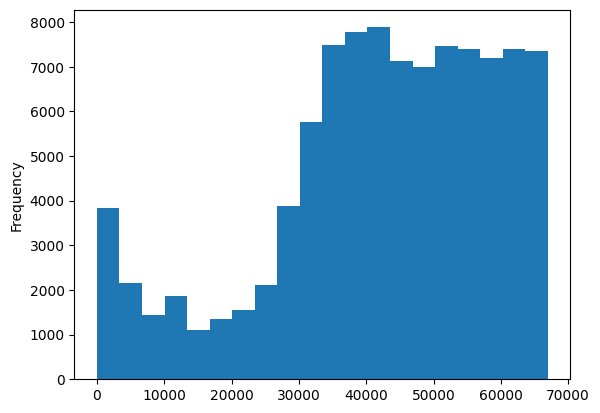

In [22]:
df['Time'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

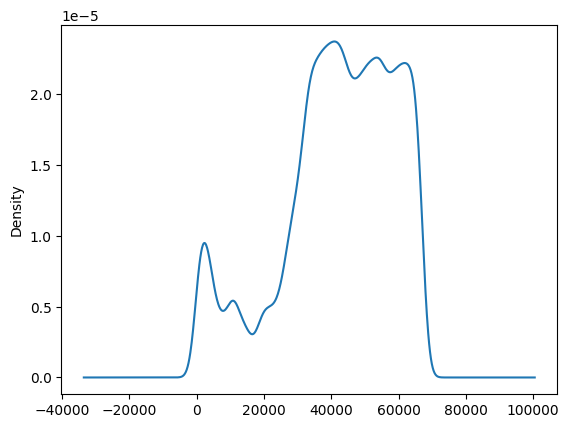

In [23]:
df['Time'].plot(kind='kde')

In [30]:
df['Time'].skew()

-0.7421809855536857

In [19]:
df['Amount'].describe()

,Amount
count,99120.000000
mean,98.115561
std,265.286809
min,0.000000
25%,7.570000
50%,26.430000
75%,89.000000
max,19656.530000


**Question: What does the histogram of transaction amounts look like?**

<Axes: ylabel='Frequency'>

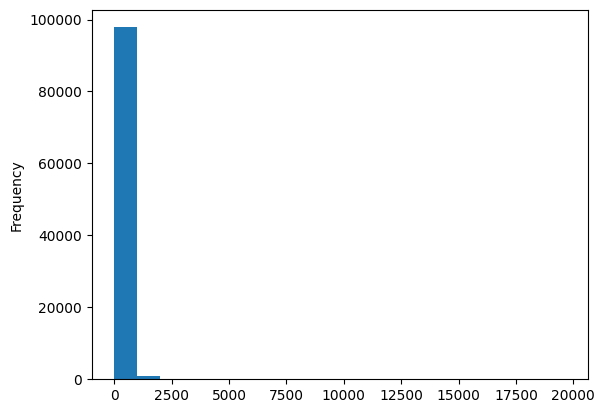

In [24]:
df['Amount'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

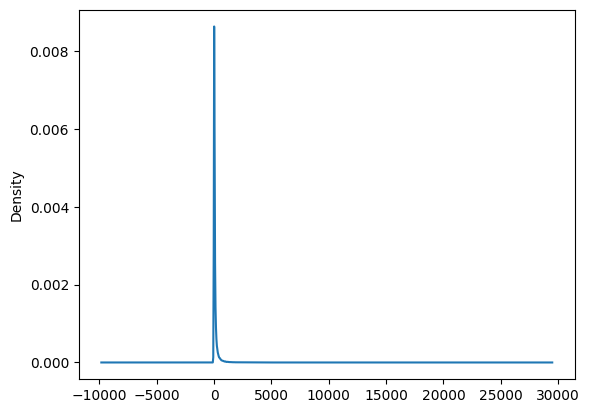

In [25]:
df['Amount'].plot(kind='kde')

In [29]:
df['Amount'].skew()

14.082196087109118

In [21]:
df['V1'].describe()

,V1
count,99121.000000
mean,-0.262004
std,1.860400
min,-56.407510
25%,-1.027973
50%,-0.260205
75%,1.153321
max,1.960497


<Axes: ylabel='Frequency'>

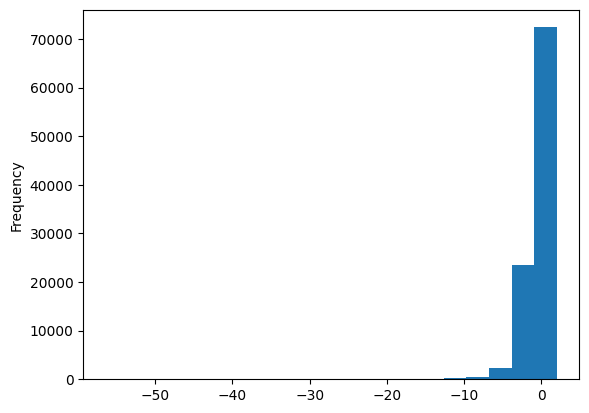

In [26]:
df['V1'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

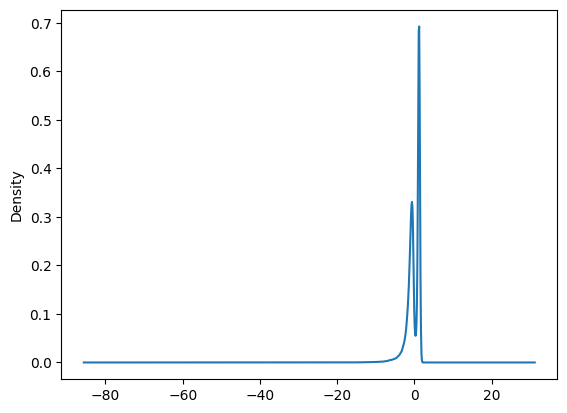

In [27]:
df['V1'].plot(kind='kde')

In [28]:
df['V1'].skew()

-3.8950663626096578

**Question: How many transactions are fraudulent, and how many are legitimate?**

In [31]:
df['Class'].value_counts()

,count
Class,
0.0,98898
1.0,222


**Question: Can we create a bar chart showing the count of fraudulent vs.legitimate transactions?**
Answer: Yes

<Axes: xlabel='Class'>

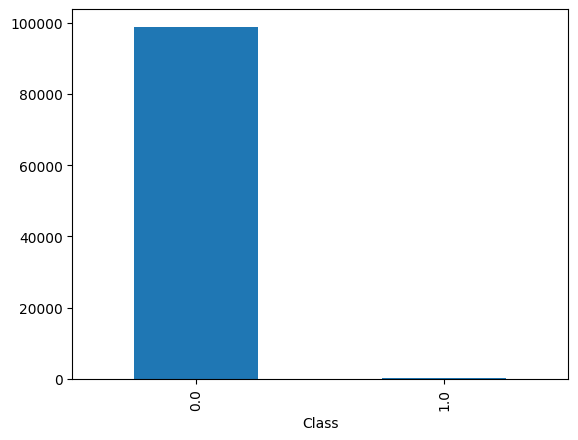

In [32]:
df['Class'].value_counts().plot(kind='bar')

**Question: What percentage of transactions are fraudulent?**
Answer: 0.2%

<Axes: ylabel='count'>

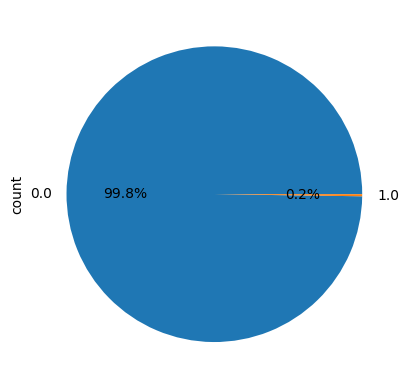

In [33]:
df['Class'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**Question: What is the maximum transaction amount in the dataset, and is it fraudulent?**
Answer: Max_amount = 19656.53 & it is not fraudulent

In [43]:
max_legitimate = df[df['Class'] == 0]['Amount'].max()
max_fraud = df[df['Class'] == 1]['Amount'].max()
print(max_legitimate)
print(max_fraud)

19656.53
1809.68


**Question: Can we use a heatmap to visualize the correlation between numerical features?**
Answer: Yes we can do that.

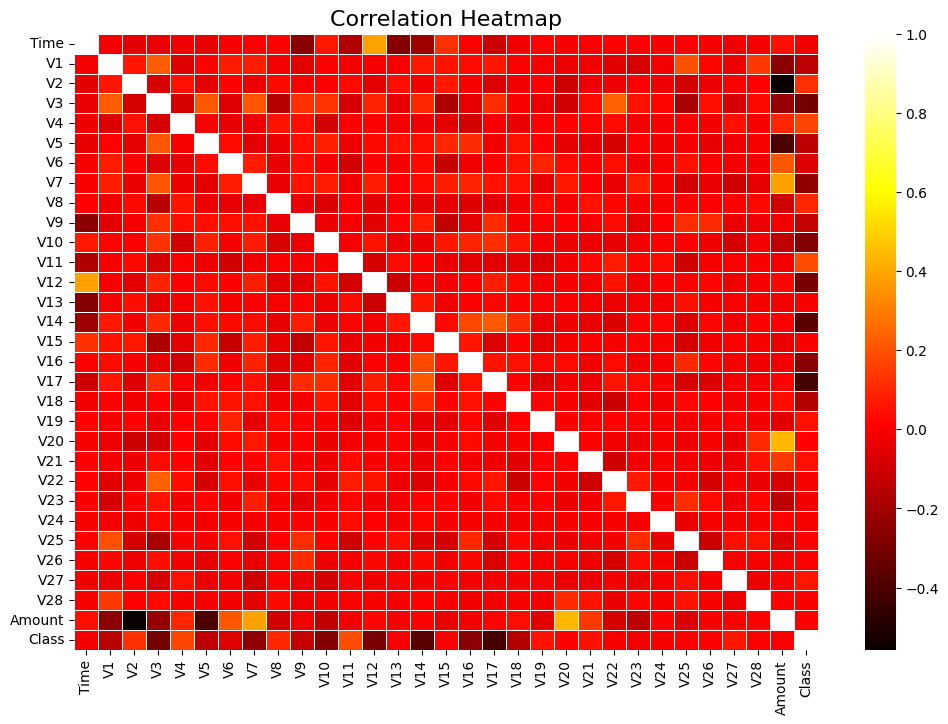

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),
            cmap='hot',
            annot=False,
            fmt=".2f",
            cbar=True,
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()